http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')

In [2]:
url="http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
adult=pd.read_csv(url, header = None)

In [3]:
adult.columns = ['age','workclass','fnlwgt','education','education-num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','income']

In [4]:
adult.head()

,age,workclass,fnlwgt,education,education-num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [72]:
df = adult.groupby('native_country')['age'].nunique()
print(df)

native_country
 ?                             59
 Cambodia                      16
 Canada                        53
 China                         40
 Columbia                      31
 Cuba                          47
 Dominican-Republic            36
 Ecuador                       20
 El-Salvador                   38
 England                       47
 France                        22
 Germany                       49
 Greece                        20
 Guatemala                     29
 Haiti                         29
 Holand-Netherlands             1
 Honduras                      10
 Hong                          15
 Hungary                       13
 India                         41
 Iran                          27
 Ireland                       15
 Italy                         40
 Jamaica                       40
 Japan                         30
 Laos                          14
 Mexico                        50
 Nicaragua                     24
 Outlying-US(Guam-USVI-etc)    11

In [5]:
adultd = pd.get_dummies(data=adult, columns=['workclass', 'education','marital_status','relationship','occupation','race','sex','income'])

In [6]:
adultd['US'] = np.where(adult.native_country.str.contains('United'),1,0)

#df['What I Want'] = np.where(df.Name.str[-4:].str.contains('H'), 'HZ',
#                       np.where(df.WELLTYPE.str.contains('Horizontal'),'HZ',
#                       np.where(df.WELLTYPE.str.contains('Deviated'),'D',
#                       np.where(df.WELLTYPE.str.contains('Multilateral'),'ML',
#                       'V'))))

In [7]:
adultd.columns

Index(['age', 'fnlwgt', 'education-num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'native_country', 'workclass_ ?',
       'workclass_ Federal-gov', 'workclass_ Local-gov',
       'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th',
       'education_ 11th', 'education_ 12th', 'education_ 1st-4th',
       'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th',
       'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors',
       'education_ Doctorate', 'education_ HS-grad', 'education_ Masters',
       'education_ Preschool', 'education_ Prof-school',
       'education_ Some-college', 'marital_status_ Divorced',
       'marital_status_ Married-AF-spouse',
       'marital_status_ Married-civ-spouse',
       'marital_status_ Married-spouse-absent',
       'marital_status_ Never-married', 'marital_status_ Separated'

In [8]:
adultd.head()

,age,fnlwgt,education-num,capital_gain,capital_loss,hours_per_week,native_country,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,...,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,income_ <=50K,income_ >50K,US
0,39,77516,13,2174,0,40,United-States,0,0,0,...,0,0,0,0,1,0,1,1,0,1
1,50,83311,13,0,0,13,United-States,0,0,0,...,0,0,0,0,1,0,1,1,0,1
2,38,215646,9,0,0,40,United-States,0,0,0,...,0,0,0,0,1,0,1,1,0,1
3,53,234721,7,0,0,40,United-States,0,0,0,...,0,0,1,0,0,0,1,1,0,1
4,28,338409,13,0,0,40,Cuba,0,0,0,...,0,0,1,0,0,1,0,1,0,0


In [9]:
adultd = adultd.drop(['native_country','income_ >50K'], 1)

In [10]:
adultd.head()

,age,fnlwgt,education-num,capital_gain,capital_loss,hours_per_week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,occupation_ Transport-moving,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,income_ <=50K,US
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,1,0,1,1,1
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,1,0,1,1,1
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,1,1,1
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,1,0,0,0,1,1,1
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0


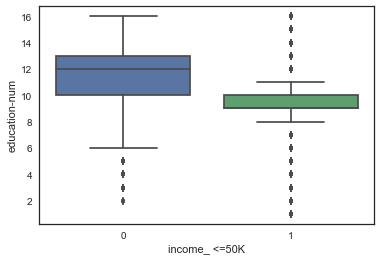

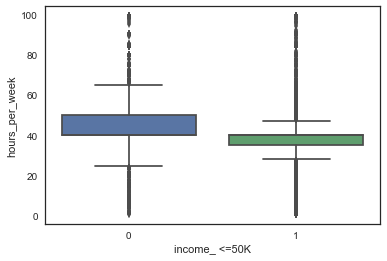

In [11]:
# Visualize data

# Bivariate relationships of predictors to income outcome.
sns.boxplot(x="income_ <=50K", y="education-num", data=adultd)
plt.show()
sns.boxplot(x="income_ <=50K", y="hours_per_week", data=adultd)
plt.show()

In [46]:
# Declare a logistic regression classifier.
# Parameter regularization coefficient C described above.
lr = LogisticRegression(C=9e9)

# Define the training and test sizes.
trainsize = int(adultd.shape[0] / 2)
df_test = adultd.iloc[trainsize:, :].copy()
df_train = adultd.iloc[:trainsize, :].copy()

y_train = df_train['income_ <=50K'].values.reshape(-1,1)
X_train = df_train[['age', 'fnlwgt', 'education-num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'workclass_ ?',
       'workclass_ Federal-gov', 'workclass_ Local-gov',
       'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th',
       'education_ 11th', 'education_ 12th', 'education_ 1st-4th',
       'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th',
       'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors',
       'education_ Doctorate', 'education_ HS-grad', 'education_ Masters',
       'education_ Preschool', 'education_ Prof-school',
       'education_ Some-college', 'marital_status_ Divorced',
       'marital_status_ Married-AF-spouse',
       'marital_status_ Married-civ-spouse',
       'marital_status_ Married-spouse-absent',
       'marital_status_ Never-married', 'marital_status_ Separated',
       'marital_status_ Widowed', 'relationship_ Husband',
       'relationship_ Not-in-family', 'relationship_ Other-relative',
       'relationship_ Own-child', 'relationship_ Unmarried',
       'relationship_ Wife', 'occupation_ ?', 'occupation_ Adm-clerical',
       'occupation_ Armed-Forces', 'occupation_ Craft-repair',
       'occupation_ Exec-managerial', 'occupation_ Farming-fishing',
       'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct',
       'occupation_ Other-service', 'occupation_ Priv-house-serv',
       'occupation_ Prof-specialty', 'occupation_ Protective-serv',
       'occupation_ Sales', 'occupation_ Tech-support',
       'occupation_ Transport-moving', 'race_ Amer-Indian-Eskimo',
       'race_ Asian-Pac-Islander', 'race_ Black', 'race_ Other', 'race_ White',#'US',
       'sex_ Female']]


Y_test = df_test['income_ <=50K'].values.reshape(-1, 1)
X_test = df_test[['age', 'fnlwgt', 'education-num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'workclass_ ?',
       'workclass_ Federal-gov', 'workclass_ Local-gov',
       'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th',
       'education_ 11th', 'education_ 12th', 'education_ 1st-4th',
       'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th',
       'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors',
       'education_ Doctorate', 'education_ HS-grad', 'education_ Masters',
       'education_ Preschool', 'education_ Prof-school',
       'education_ Some-college', 'marital_status_ Divorced',
       'marital_status_ Married-AF-spouse',
       'marital_status_ Married-civ-spouse',
       'marital_status_ Married-spouse-absent',
       'marital_status_ Never-married', 'marital_status_ Separated',
       'marital_status_ Widowed', 'relationship_ Husband',
       'relationship_ Not-in-family', 'relationship_ Other-relative',
       'relationship_ Own-child', 'relationship_ Unmarried',
       'relationship_ Wife', 'occupation_ ?', 'occupation_ Adm-clerical',
       'occupation_ Armed-Forces', 'occupation_ Craft-repair',
       'occupation_ Exec-managerial', 'occupation_ Farming-fishing',
       'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct',
       'occupation_ Other-service', 'occupation_ Priv-house-serv',
       'occupation_ Prof-specialty', 'occupation_ Protective-serv',
       'occupation_ Sales', 'occupation_ Tech-support',
       'occupation_ Transport-moving', 'race_ Amer-Indian-Eskimo',
       'race_ Asian-Pac-Islander', 'race_ Black', 'race_ Other', 'race_ White',#'US',
       'sex_ Female']]



In [47]:

# Fit the model.
fit = lr.fit(X_train, y_train)

# Display.
print('Coefficients')
logistic_params = fit.coef_
print(logistic_params)
print(fit.intercept_)


Coefficients
[[  3.59338063e-03   3.91210040e-06   2.54581456e-03  -3.19300111e-04
   -7.75257875e-04   1.00065824e-02   5.00260000e-04  -1.51040851e-04
   -8.52153843e-05   2.38889143e-06   2.01179425e-03  -3.97861902e-04
   -3.93128379e-06  -1.04064593e-05   3.85836626e-06   2.72427958e-04
    4.15759572e-04   1.16889937e-04   4.50645020e-05   9.23241434e-05
    1.80239201e-04   1.55457743e-04   2.49316560e-05   7.49618781e-05
   -1.04258450e-03  -2.65656399e-04   1.73551167e-03  -6.83868077e-04
    1.91642248e-05  -2.95206735e-04   1.02442885e-03   1.20388872e-03
   -3.93741067e-06  -3.98299218e-03   1.33281672e-04   3.90638243e-03
    2.93973006e-04   3.19249395e-04  -3.57811767e-03   2.30485857e-03
    3.40976857e-04   2.14425351e-03   1.10230936e-03  -4.44434994e-04
    5.02648892e-04   8.93283051e-04   2.48649064e-06   2.47269258e-04
   -1.22991238e-03   2.65410017e-04   3.81469903e-04   4.18576507e-04
    1.20788549e-03   6.39663347e-05  -9.87946094e-04  -9.01529920e-05
    1.1

C:\Users\boyerm\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
Y_test = Y_test.ravel()   #re-arranges from vert to horiz
pred_y_sklearn = lr.predict(X_test)
print(lr.score(X_train, y_train))

print('\n Accuracy by income level')
print(pd.crosstab(pred_y_sklearn, Y_test))

print('\n R-squared')
print(lr.score(X_test, Y_test))

0.797235872236

 Accuracy by income level
col_0     0      1
row_0             
0      1047    377
1      2897  11960

 R-squared
0.798906701063


## Ridge Regression

In [49]:
# l2 penalty is ridge (squared), l1 is ridge (abs value)
rlr = LogisticRegression(penalty='l2',C=0.1)  
llr = LogisticRegression(penalty='l1',C=.1)

In [51]:
rlr.fit(X_train, y_train)
print(rlr.score(X_train, y_train))
ridge_params = rlr.coef_
print(ridge_params)
print('\nR-squared = Ridge:')
print(rlr.score(X_test, Y_test))

0.79742014742
[[  3.71447047e-03   3.89490787e-06   3.01911815e-03  -3.19122092e-04
   -7.75047005e-04   9.79800841e-03   7.81908912e-04  -2.37573824e-04
   -1.36047015e-04   3.70465522e-06   3.06264584e-03  -6.23977138e-04
   -1.37914131e-05  -1.89799168e-05   5.97328029e-06   4.23120780e-04
    6.46054977e-04   1.81065407e-04   7.10696979e-05   1.44307228e-04
    2.81215764e-04   2.41998015e-04   3.58686139e-05   1.11045418e-04
   -1.64054780e-03  -4.14789522e-04   2.67212913e-03  -1.06880310e-03
    3.00260667e-05  -4.61113984e-04   1.57121669e-03   1.85959014e-03
   -6.29258949e-06  -6.22489496e-03   2.06396814e-04   6.03068128e-03
    4.55670529e-04   5.02712169e-04  -5.59383905e-03   3.55582154e-03
    5.28885461e-04   3.31739680e-03   1.70773792e-03  -6.92139292e-04
    7.85613567e-04   1.38094622e-03   3.84247756e-06   3.73289841e-04
   -1.92799371e-03   4.05737133e-04   5.89763513e-04   6.46597556e-04
    1.87497120e-03   1.00100355e-04  -1.54963580e-03  -1.41576106e-04
    1.

C:\Users\boyerm\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
pred_ridge = rlr.predict(X_test)

In [37]:
print('\n Accuracy by income level')
print(pd.crosstab(pred_ridge, Y_test))



 Accuracy by income level
col_0     0      1
row_0             
0      1048    373
1      2896  11964


## LASSO Regression

In [44]:
llr.fit(X_train, y_train)
print(llr.score(X_train, y_train))
lasso_params = llr.coef_
print(lasso_params)
print('\nR-squared  - Lasso:')
print(llr.score(X_test, Y_test))
print('\n Accuracy by income level')
pred_lasso = llr.predict(X_test)
print(pd.crosstab(pred_lasso, Y_test))

C:\Users\boyerm\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.849447174447
[[ -2.19453243e-02  -3.07755959e-07  -2.43721622e-01  -2.84927471e-04
   -6.43694454e-04  -2.58105904e-02   2.37871810e-01  -3.15409636e-01
    0.00000000e+00   0.00000000e+00   0.00000000e+00  -9.01501910e-02
    3.15144066e-01   3.28636209e-02   0.00000000e+00   0.00000000e+00
    1.10301701e-01   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   1.08135370e-01   0.00000000e+00
    0.00000000e+00   0.00000000e+00   5.03982092e-02   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   3.25537074e-02
    0.00000000e+00  -1.56843138e+00   0.00000000e+00   4.83030433e-01
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    3.42128494e-01   1.00545220e+00   1.31949370e-01  -1.04358097e+00
    1.33680137e-01   6.28194559e-02   0.00000000e+00   0.00000000e+00
   -7.38174275e-01   9.28464064e-01   4.14174137e-01   2.10926323e-01
    7.40553152e-01   0.00000000e+00  -5.19280272e-01  -1.70302393e-01
   -1


Lasso logistic regression has the best R2

In your report, evaluate all three models and decide on your best. Be clear about the decisions you made that led to these models (feature selection, regularization parameter selection, model evaluation criteria) and why you think that particular model is the best of the three. Also reflect on the strengths and limitations of regression as a modeling approach. Were there things you couldn't do but you wish you could have done?

I will start by saying I'm not sure I got the Ridge regression right because the L2 is the default and that's what I think you use for ridge. So, I just increased the c coefficient for the logistic regression to be very large (so it doesn't penalize large coefficients) and for ridge, I made it much lower.

As I said above, the Lasso Regression model here has the best r-squared. However, looking deeper at the accuracy, there are some interesting trade-offs.

The logistic and ridge regressions have about the same true negative and true positive rate. The LASSO regression is much stronger on the true negative (over 2 times better). However, the true positive rate is slightly worse.

What I like about LASSO is now it gives me much fewer variables to think about in my model. This makes it easier to explain and easier to operationalize any changes (if this were that type of problem).  It would allow me to not have to worry about certain features which in real life is good. The limitations of regression remain:  linearity (of the transformed probabilities and the predictors), multivariate normality of the residuals, homoscedasticity (variance of the residuals is constant across all predicted values), and low multicollinearity. And there needs to be an adequate sample size for the model to work.